# Graphical Integrity


Graphics are just like words, they can be used to deceive

## What is wrong with this figure?
<img src="https://github.com/jagar2/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/blob/master/lectures/4_Visualization/images/Army_Figure.png?raw=true" width="1200">

* Y scale is non-uniform
* Negative data is not represented well

# Bar charts
* Bar charts show representation within groups that conceals the data
* Should only be used for histograms


![](https://github.com/jagar2/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/blob/master/lectures/4_Visualization/images/Bar_chart.jpeg?raw=true)

# Color scales

* Colorful
* pretty
* should be sequential
* accurately represents the values color to brain
* print in grayscale
* good for colorblind

# Why colormaps matter?
Your eyes interpretation of the colormap represents the scale of the y-axis. <br>
**Use of inappropriate colormap is like having a non-linear y-axis!**

# The most common colormap JET
![title](https://github.com/jagar2/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/blob/master/lectures/4_Visualization/images/jet.png?raw=true)

# This is what JET looks like
![title](https://github.com/jagar2/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/blob/master/lectures/4_Visualization/images/Mona_1.png?raw=true)

# Matlab's Default [Parula]
![title](https://github.com/jagar2/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/blob/master/lectures/4_Visualization/images/parula.png?raw=true)

# Perceptually uniform colormaps [Viridis]
![title](https://github.com/jagar2/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/blob/master/lectures/4_Visualization/images/viridis.png?raw=true)

# More details about perceptually correct colormaps

In [ ]:
from IPython.display import IFrame
IFrame(src='https://bids.github.io/colormap/', width=1000, height=1000)

# Choosing Colors for your Figures

In [1]:
IFrame(src='http://colorbrewer2.org', width=200, height=200)

NameError: ignored

# Types of Graphs

In [ ]:
IFrame(src='https://www.data-to-viz.com/', width=1000, height=1200)

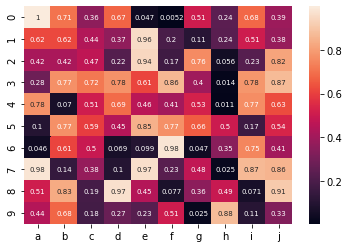

In [ ]:
# library
import seaborn as sns
import pandas as pd
import numpy as np
 
# Create a dataset (fake)
df = pd.DataFrame(np.random.random((10,10)), columns=["a","b","c","d","e","f","g","h","i","j"])

sns.heatmap(df, annot=True, annot_kws={"size": 7})
#sns.plt.show()


# Violin Plots
* Like a box plot but provides a deeper understanding of data density
* Good when you have large datasets

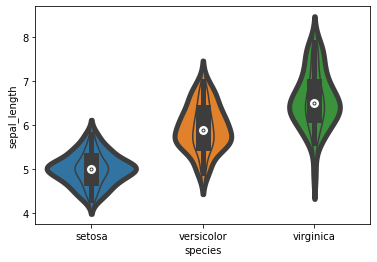

In [ ]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')
 
# Change line width
sns.violinplot( x=df["species"], y=df["sepal_length"], linewidth=5)
 
# Change width
sns.violinplot( x=df["species"], y=df["sepal_length"], width=0.3)

# 2D Density Plot
* Used to compare 2D quantitative information
* Good for small data sets
* When the density of data is high (shouldn't use a scatter plot)

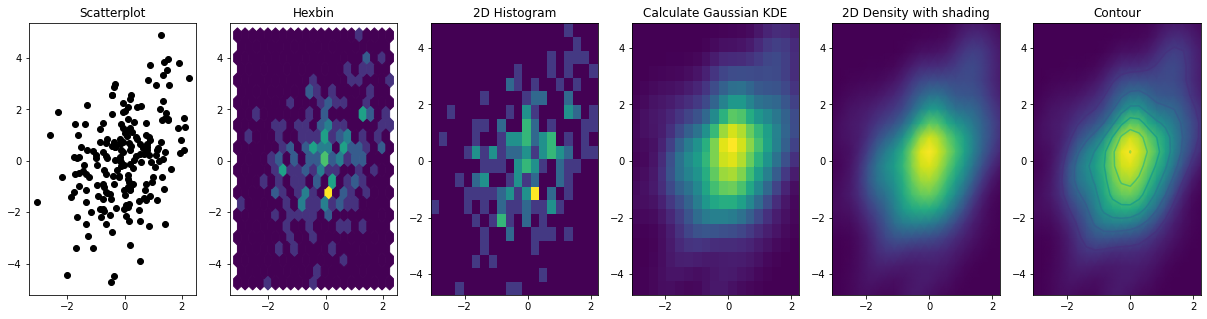

In [ ]:
# Create data: 200 points
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
x, y = data.T # transpose the data
 
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(21, 5))
 
# Everything sarts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')
# As you can see there is a lot of overplottin here!
 
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.viridis)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.viridis)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = stats.kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.viridis)
 
# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.viridis)
 
# contour
axes[5].set_title('Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.viridis)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )

# Correlogram
A correlogram or correlation matrix allows to analyse the relationship between each pair of numerical variables of a matrix.

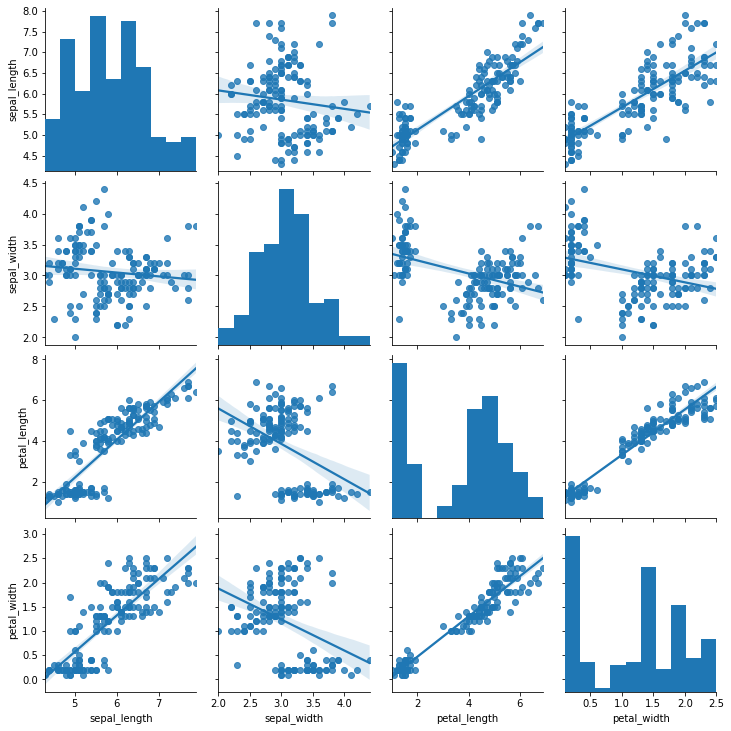

In [ ]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris')
 
# with regression
sns.pairplot(df, kind="reg")
plt.show()

# Dendrogram
* A dendrogram or tree diagram allows to illustrate the hierarchical organisation of several entities.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


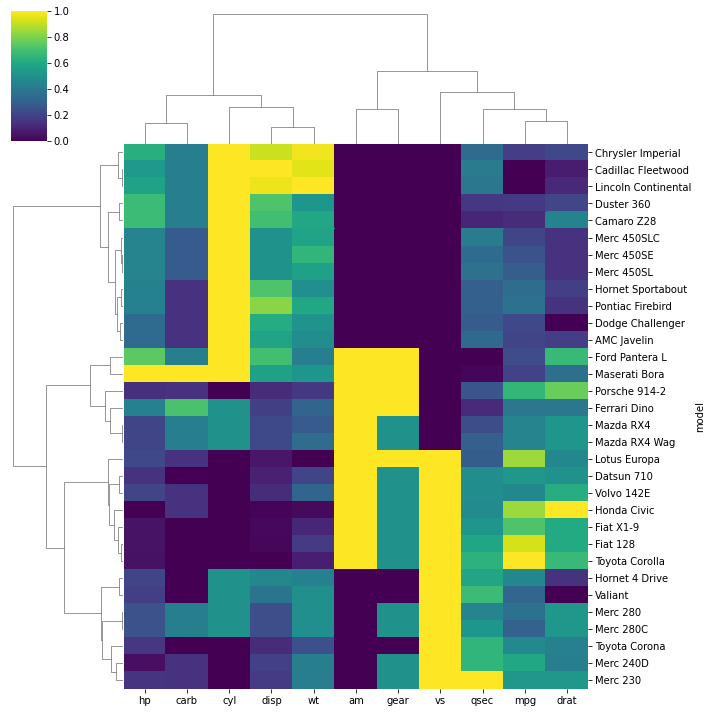

In [2]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url) # reads the dataset
df = df.set_index('model') # Sets the index using existing columns

 
# Change color palette
sns.clustermap(df, metric="euclidean", standard_scale=1, method="ward", cmap="viridis")

In [ ]:
# views the header of the dataframe
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Graph Structures
* Show interconnections between a set of entities. 
* Each entity is represented by a Node (or vertices). 
* Connection between nodes are represented through links (or edges).
* Directed or undirected, weighted or unweighted.

True
Configuration model
Degree sequence [5, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1]
Degree histogram
degree #nodes
5 1
3 4
2 3
1 3


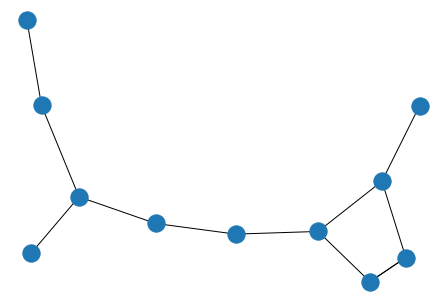

In [ ]:
#!/usr/bin/env python
"""
===============
Degree Sequence
===============
Random graph from given degree sequence.
"""
# Author: Aric Hagberg (hagberg@lanl.gov)
# Date: 2004-11-03 08:11:09 -0700 (Wed, 03 Nov 2004)
# Revision: 503

#    Copyright (C) 2004-2019 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import matplotlib.pyplot as plt
from networkx import nx

# builds a vector
z = [5, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1]

# converts to a network structure
print(nx.is_graphical(z))

print("Configuration model")
G = nx.configuration_model(z)  # configuration model
degree_sequence = [d for n, d in G.degree()]  # degree sequence
print("Degree sequence %s" % degree_sequence)
print("Degree histogram")
hist = {}
for d in degree_sequence:
    if d in hist:
        hist[d] += 1
    else:
        hist[d] = 1
print("degree #nodes")
for d in hist:
    print('%d %d' % (d, hist[d]))

nx.draw(G)
plt.show()

# Guiding Principles

# Pie Charts
* Never use them ... people are not good at determining angles
![title](https://github.com/jagar2/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/blob/master/lectures/4_Visualization/images/pie_chart_1.png?raw=true)

# Overplotting
Make sure the density of datapoints is visible!
![title](https://github.com/jagar2/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/blob/master/lectures/4_Visualization/images/overplotting_1.png?raw=true)

![title](https://github.com/jagar2/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/blob/master/lectures/4_Visualization/images/overplotting_2.png?raw=true)

![title](https://github.com/jagar2/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/blob/master/lectures/4_Visualization/images/overplotting_3.png?raw=true)

# 3D graphics
While 3D might look cool ... it is nearly impossible to extract information

# Don't: 3D bar charts
Information is hidden in 3D space
![title](https://github.com/jagar2/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/blob/master/lectures/4_Visualization/images/3d_1.png?raw=true)

# Don't: Fixed 3D scatter plots
You cannot see the data
![title](https://github.com/jagar2/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/blob/master/lectures/4_Visualization/images/3d_2.png?raw=true)

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [ ]:
import plotly.express as px
iris = px.data.iris()
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width',
                    color='petal_length', symbol='species')
fig.show()

In [ ]:
!pip install plotly
import plotly.graph_objects as go

import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=[go.Surface(z=z_data.values)]) #builds the figure

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500, # sets the height and width
                  margin=dict(l=65, r=50, b=65, t=90)) # sets the boundaries

fig.show()


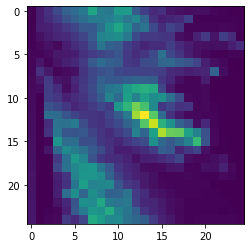

In [ ]:
import matplotlib.pyplot as plt 

# plots the image as 2d
plt.imshow(z_data.values)

# WTF Graphs

In [ ]:
IFrame(src='https://viz.wtf/', width=1000, height=1000)

# Interactive Visualization Platforms

[Matplotlib](https://matplotlib.org/3.1.1/users/interactive.html) - There are options in matplotlib but they are not well developed

[Bokeh](https://docs.bokeh.org/en/latest/index.html) - Interactive visualization on the web

[Plotly](https://plotly.com/python/) - Rich high-level interactive visualization platform

[mpld3](http://mpld3.github.io/) - Javascript converted for matplotlib graphs

## What is Bokeh

Bokeh is an interactive visualization library that targets modern web browsers for presentation. It is good for:

* Interactive visualization in modern browsers
* Standalone HTML documents, or server-backed apps
* Expressive and versatile graphics
* Large, dynamic or streaming data
* Easy usage from python (or Scala, or R, or...)

And most importantly:

## <center><i>NO JAVASCRIPT REQUIRED</i></center>

Bokeh is an interactive visualization library for modern web browsers. It provides elegant, concise construction of versatile graphics, and affords high-performance interactivity over large or streaming datasets. Bokeh can help anyone who would like to quickly and easily make interactive plots, dashboards, and data applications.


# Imports and Setup


In [1]:
# Standard imports 

from bokeh.io import output_notebook, show
output_notebook() # makes the bokeh plot display in the jupyter notebook

In [2]:
# Plot a complex chart with interactive hover in a few lines of code

from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap

# converst dataframe to a string
df.cyl = df.cyl.astype(str)
df.yr = df.yr.astype(str)

# creates a group for the df
group = df.groupby(by=['cyl', 'mfr'])

# builds the group for the df
source = ColumnDataSource(group)

# builds the figure
p = figure(plot_width=800, plot_height=300, title="Mean MPG by # Cylinders and Manufacturer",
           x_range=group, toolbar_location=None, tools="")

# sets some of the properties
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Manufacturer grouped by # Cylinders"
p.xaxis.major_label_orientation = 1.2

# builds a colormap based on the group names (this is a dict)
index_cmap = factor_cmap('cyl_mfr', palette=['#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c'], 
                         factors=sorted(df.cyl.unique()), end=1)

# plots the bar chart
p.vbar(x='cyl_mfr', top='mpg_mean', width=1, source=source,
       line_color="white", fill_color=index_cmap, 
       hover_line_color="darkgrey", hover_fill_color=index_cmap)

# builds the callback for the hovertools
p.add_tools(HoverTool(tooltips=[("MPG", "@mpg_mean"), ("Cyl, Mfr", "@cyl_mfr")]))

show(p)

In [3]:
# Create and deploy interactive data applications

from IPython.display import IFrame
IFrame('https://demo.bokeh.org/sliders', width=900, height=500)

# Imports and Setup

When using the [`bokeh.plotting`](https://bokeh.pydata.org/en/latest/docs/user_guide/plotting.html) interface, there are a few common imports:
* Use the [`figure`](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure) function to  create new plot objects to work with. 
* Call the functions [`output_file`](https://bokeh.pydata.org/en/latest/docs/reference/resources_embedding.html#bokeh.io.output_file) or [`output_notebook`](https://bokeh.pydata.org/en/latest/docs/reference/resources_embedding.html#bokeh.io.output_notebook) (possibly in combination) to tell Bokeh how to display or save output. 
* Execute [`show`](https://bokeh.pydata.org/en/latest/docs/reference/resources_embedding.html#bokeh.io.show) and  [`save`](https://bokeh.pydata.org/en/latest/docs/reference/resources_embedding.html#bokeh.io.save) to display or save plots and layouts.


In [4]:
import numpy as np # we will use this later, so import it now

from bokeh.io import output_notebook, show
from bokeh.plotting import figure


In this case, we are in the Jupyter notebook, so we will call `output_notebook()` below. We only need to call this once, and all subsequent calls to `show()` will display inline in the notebook.

output_notebook()

If everything is working, you should see a Bokeh logo and a message like *\"BokehJS 1.4.0 successfully loaded."* as the output. 

This notebook uses Bokeh sample data. If you haven't downloaded it already, this can be downloaded by running the following:


In [5]:
import bokeh.sampledata

# downloads some sample data
bokeh.sampledata.download()

Creating /root/.bokeh directory
Creating /root/.bokeh/data directory
Using data directory: /root/.bokeh/data
Downloading: CGM.csv (1589982 bytes)
   1589982 [100.00%]
Downloading: US_Counties.zip (3171836 bytes)
   3171836 [100.00%]
Unpacking: US_Counties.csv
Downloading: us_cities.json (713565 bytes)
    713565 [100.00%]
Downloading: unemployment09.csv (253301 bytes)
    253301 [100.00%]
Downloading: AAPL.csv (166698 bytes)
    166698 [100.00%]
Downloading: FB.csv (9706 bytes)
      9706 [100.00%]
Downloading: GOOG.csv (113894 bytes)
    113894 [100.00%]
Downloading: IBM.csv (165625 bytes)
    165625 [100.00%]
Downloading: MSFT.csv (161614 bytes)
    161614 [100.00%]
Downloading: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip (4816256 bytes)
   4816256 [100.00%]
Unpacking: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.csv
Downloading: gapminder_fertility.csv (64346 bytes)
     64346 [100.00%]
Downloading: gapminder_population.csv (94509 bytes)
     94509 [100.00%]
Downloading: gapminder_life_e


# Scatter Plots

Bokeh can draw many types of visual shapes (called *glyphs*), including lines, bars, patches, hex tiles and more. One of the most common visualization tasks is to draw a scatter plot of data using small *marker* glyphs to represent each point. 

In this section you will see how to use Bokeh's various marker glyphs to create simple scatter plots. 

The basic outline is:
* create a blank figure: `p = figure(...)`
* call a glyph method such as `p.circle` on the figure
* `show` the figure

Execute the cell below to create a small scatter plot with circle glyphs:



# Scatter Plots



In [6]:
from bokeh.plotting import figure

p = figure(plot_width=400, plot_height = 400)

p.circle(np.linspace(0,4,5),np.linspace(0,4,5), size=(1+np.linspace(0,4,5))*5, line_color='blue', fill_color = 'orange', fill_alpha = 0.5)

show(p)


In the output above, you can see the effect of the different options for `line_color`, `fill_alpha`, etc. Try changing some of these values and re-executing the cell to update the plot.

All Bokeh scatter markers accept `size` (measured in screen space units) as a property. Circles in particular also have `radius` (measured in "data" space units).

Note that in the example above, we are also specifying different sizes for each individual marker. **In general, all of a glyph's properties can be "vectorized" in this fashion.**  Also note that we have passed ``color`` as a shorthand to set both the line and fill colors easily at the same time. This is a convenience specific to ``bokeh.plotting``.

There are many marker types available in Bokeh, you can see details and
example plots for all of them in the reference guide by clicking on entries in the list below:

* [asterisk()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.asterisk)
* [circle()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.circle)
* [circle_cross()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.circle_cross)
* [circle_x()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.circle_x)
* [cross()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.cross)
* [diamond()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.diamond)
* [diamond_cross()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.diamond_cross)
* [hex()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.hex)
* [inverted_triangle()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.inverted_triangle)
* [square()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.square)
* [square_cross()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.square_cross)
* [square_x()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.square_x)
* [triangle()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.triangle)
* [x()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.x)


# Linked Interactions


In [7]:
from bokeh.layouts import gridplot

x = list(range(11)) # creates a list

# builds 3 different graphs of data
y0, y1, y2 = x, [10-i for i in x], [abs(i-5) for i in x]

# builds a dictionary 
plot_options = dict(width=250, plot_height=250, tools='pan,wheel_zoom')

# create a new plot
s1 = figure(**plot_options)
# plots the first graph
s1.circle(x, y0, size=10, color="navy")

# create a new plot and share both ranges
s2 = figure(x_range=s1.x_range, y_range=s1.y_range, **plot_options)
s2.triangle(x, y1, size=10, color="firebrick")

# create a new plot and share only one range
s3 = figure(x_range=s1.x_range, **plot_options)
s3.square(x, y2, size=10, color="olive")

p = gridplot([[s1, s2, s3]])

# show the results
show(p)

## Linked brushing

Linking selections is accomplished in a similar way, by sharing data sources between plots. Note that normally with ``bokeh.plotting`` and ``bokeh.charts`` creating a default data source for simple plots is handled automatically. However to share a data source, we must create them by hand and pass them explicitly. This is illustrated in the example below:

In [8]:
from bokeh.models import ColumnDataSource

# builds the x range
x = list(range(-20, 21))
# builds the y graphs
y0, y1 = [abs(xx) for xx in x], [xx**2 for xx in x]

# create a column data source for the plots to share
source = ColumnDataSource(data=dict(x=x, y0=y0, y1=y1))

# Sets the tools that you want to be active
TOOLS = "box_select,lasso_select,help"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=300, height=300)
left.circle('x', 'y0', source=source)

# create another new plot and add a renderer
right = figure(tools=TOOLS, width=300, height=300)
right.circle('x', 'y1', source=source)

# builds the gridplot
p = gridplot([[left, right]])

# shows the graph 
show(p)

# Hover Tools

Bokeh has a Hover Tool that allows additional information to be displayed in a popup whenever the user hovers over a specific glyph. Basic hover tool configuration amounts to providing a list of ``(name, format)`` tuples. The full details can be found in the User's Guide [here](https://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#hovertool).

The example below shows some basic usage of the Hover tool with a circle glyph, using hover information defined in utils.py:

In [19]:
import numpy as np
x = np.random.randint((5))
y = np.random.randint((5))

In [23]:
from bokeh.models import HoverTool, ColumnDataSource

source = ColumnDataSource(
    data = dict(
        x = np.linspace(0,10,5),
        y = np.linspace(3,200,5),
        desc = ['A', 'B', 'A', 'd', 'E']
    )   
)


hover = HoverTool(
    tooltips= [
               ('Index', '$index'),
               ('(x,y)', "($x, $y)"),
               ('desc', '@desc'),
               ('x = ', '@x'),
    ]
)

p = figure(plot_width = 400, plot_height = 400, tools=[hover], title = 'mouse over dots')

p.circle('x', 'y', size=20, source = source)

show(p)

# Widgets

Bokeh supports direct integration with a small basic widget set. These can be used in conjunction with a Bokeh Server, or with ``CustomJS`` models to add more interactive capability to your documents. You can see a complete list, with example code in the [Adding Widgets](https://bokeh.pydata.org/en/latest/docs/user_guide/interaction.html#adding-widgets) section of the User's Guide. 

To use the widgets, include them in a layout like you would a plot object:

In [26]:
from bokeh.models.widgets import Slider

slider = Slider(start = 0, end = 10 , value = 1, step=.1, title = 'do nothing')

show(slider)

# CustomJS Callbacks


Bokeh supports direct integration with a small basic widget set. These can be used in conjunction with a Bokeh Server, or with ``CustomJS`` models to add more interactive capability to your documents. You can see a complete list, with example code in the [Adding Widgets](https://bokeh.pydata.org/en/latest/docs/user_guide/interaction.html#adding-widgets) section of the User's Guide. 

To use the widgets, include them in a layout like you would a plot object:Bokeh supports direct integration with a small basic widget set. These can be used in conjunction with a Bokeh Server, or with ``CustomJS`` models to add more interactive capability to your documents. You can see a complete list, with example code in the [Adding Widgets](https://bokeh.pydata.org/en/latest/docs/user_guide/interaction.html#adding-widgets) section of the User's Guide. 

To use the widgets, include them in a layout like you would a plot object:

In [27]:
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider

x = [x*0.005 for x in range(0, 201)]  

source = ColumnDataSource(data=dict(x=x, y=x))

plot = figure(plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

slider = Slider(start=0.1, end=6, value=1, step=.1, title="power")

update_curve = CustomJS(args=dict(source=source, slider=slider), code="""
    var data = source.data;
    var f = slider.value;
    var x = data['x']
    var y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = Math.pow(x[i], f)
    }
    
    // necessary becasue we mutated source.data in-place
    source.change.emit();
""")
slider.js_on_change('value', update_curve)


show(column(slider, plot))

## Additional Information

There are many kinds of interactions and events that can be connected to `CustomJS` callbacks. 


* Widgets - Button, Toggle, Dropdown, TextInput, AutocompleteInput, Select, Multiselect, Slider, (DateRangeSlider), DatePicker,
* Tools - TapTool, BoxSelectTool, HoverTool,
* Selection - ColumnDataSource, AjaxDataSource, BlazeDataSource, ServerDataSource
* Ranges - Range1d, DataRange1d, FactorRange


For more complete examples the User Guide section on [JavaScript Interactions](https://bokeh.pydata.org/en/latest/docs/user_guide/interaction.html)

# Fully Customizable Graphical User Interfaces

* This cannot be done inside of google collab 

[Tkinter](https://docs.python.org/3/library/tkinter.html) - Python interface for TK a base graphical user interface program

[PyQT](https://build-system.fman.io/pyqt5-tutorial) - A GUI front-end developed in Python for QT a GUI software written in C++

[PyQTGraph](http://www.pyqtgraph.org/) - A wrapper around PyQT with easy graph intergration

[Kivy](https://kivy.org/#home) - Cross platform GUI development with multitouch capabilities


In [28]:
import tkinter as tk

class Application(tk.Frame):
    def __init__(self, master=None):
        super().__init__(master)
        self.master = master
        self.pack()
        self.create_widgets()

    def create_widgets(self):
        self.hi_there = tk.Button(self)
        self.hi_there["text"] = "Hello World\n(click me)"
        self.hi_there["command"] = self.say_hi
        self.hi_there.pack(side="top")

        self.quit = tk.Button(self, text="QUIT", fg="red",
                              command=self.master.destroy)
        self.quit.pack(side="bottom")

    def say_hi(self):
        print("hi there, everyone!")

root = tk.Tk()
app = Application(master=root)
app.mainloop()

TclError: ignored

# Assignment 6: 

Take the figure you made for Assigment 5 and make it interactive using one of the packages discussed in class. Make sure to add one interactive and responsive element. This could be as simple as changing the marker shape or color, or changing the scale of the axis. 